# Lecture 8: Unsupervised Learning - K-means Clustering 

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Unsupervised Learning
- K-means Clustering
- Elbow method


#### References:
[1] StatQuest: K-means clustering: https://www.youtube.com/watch?v=4b5d3muPQmA&t=121s&ab_channel=StatQuestwithJoshStarmer
<br>[2] StatQuest: Hierarchical Clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo&t=548s&ab_channel=StatQuestwithJoshStarmer
<br>[3] Unsupervised Learning: PCA and KMeans clustering: https://github.com/SKawsar/road_accident_analysis/blob/main/usl_pca_kmeans.ipynb
<br>[4] sklearn K-means clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br>[5] sklearn MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
<br> [6] sklearn StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Dataset source: https://archive.ics.uci.edu/ml/datasets/iris
Columns in the iris dataset:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica
    
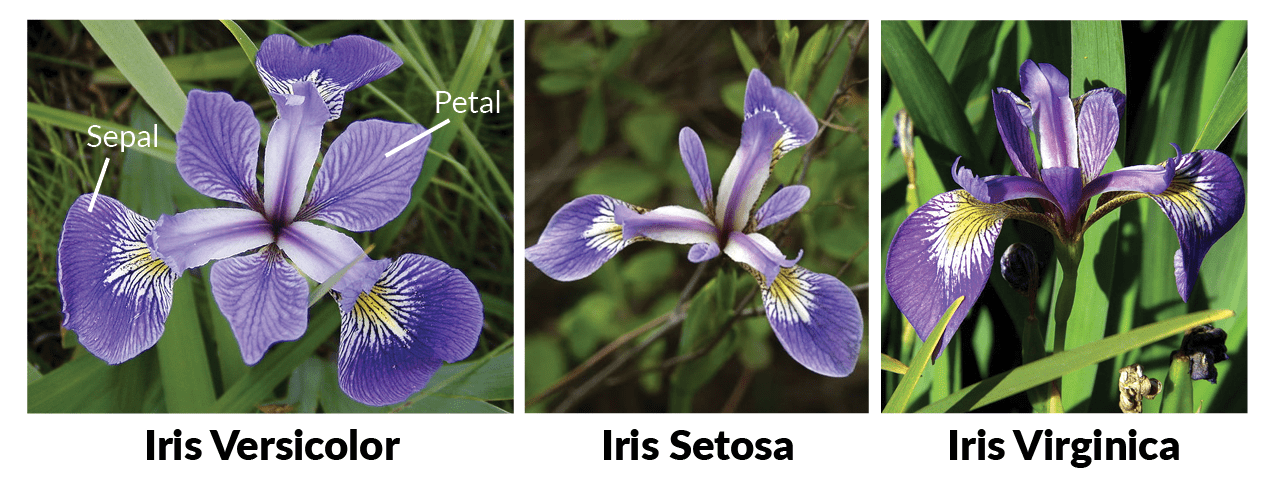
image source: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

In [2]:
df = pd.read_csv("iris.data", header=None)
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

display(df.sample(10))
print(df.shape)

,sepal length,sepal width,petal length,petal width,class
110,6.5,3.2,5.1,2.0,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica


(150, 5)


**Exploratory Data Analysis**

In [3]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


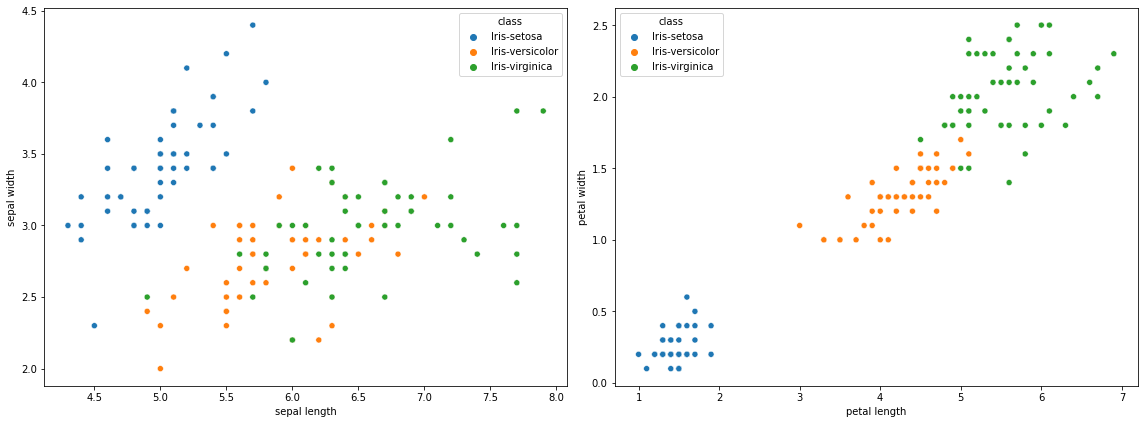

In [4]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='sepal length', 
                y='sepal width', 
                data=df, 
                hue='class')

plt.subplot(1,2,2)
sns.scatterplot(x='petal length', 
                y='petal width', 
                data=df, 
                hue='class')

plt.tight_layout()
plt.show()

In [5]:
features = df.drop('class', axis=1)
y = df['class']

print(features.shape, y.shape)

(150, 4) (150,)


#### Data Transformation

In [6]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in features.columns:
    features[col] = scaler.fit_transform(features[[col]])

display(features.sample(10))

,sepal length,sepal width,petal length,petal width
119,0.472222,0.083333,0.677966,0.583333
56,0.555556,0.541667,0.627119,0.625000
24,0.138889,0.583333,0.152542,0.041667
139,0.722222,0.458333,0.745763,0.833333
85,0.472222,0.583333,0.593220,0.625000
43,0.194444,0.625000,0.101695,0.208333
19,0.222222,0.750000,0.084746,0.083333
73,0.500000,0.333333,0.627119,0.458333
134,0.500000,0.250000,0.779661,0.541667
130,0.861111,0.333333,0.864407,0.750000


In [7]:
features.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [8]:
# Create a KMeans instance with 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Fit model to features
labels = model.fit_predict(features)

# Print cluster labels of features
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [9]:
def cluster_plot(data, col_1, col_2):
    """
    Args:
        col_1 (int): column position
        col_2 (int): column position
    Returns:
        scatterplot of the clusters
    """
    
    # create a scatter plot using labels to define the colors
    plt.scatter(data.iloc[:, col_1], data.iloc[:, col_2], c=labels)
    plt.xlabel(data.columns[col_1])
    plt.ylabel(data.columns[col_2])

    # Assign the cluster centers: centroids
    centroids = model.cluster_centers_

    # Assign the columns of centroids: centroids_x, centroids_y
    centroids_x = centroids[:, col_1]
    centroids_y = centroids[:, col_2]

    # Make a scatter plot of centroids_x and centroids_y
    plt.scatter(centroids_x, centroids_y, marker = 'D', s=50, color='r')

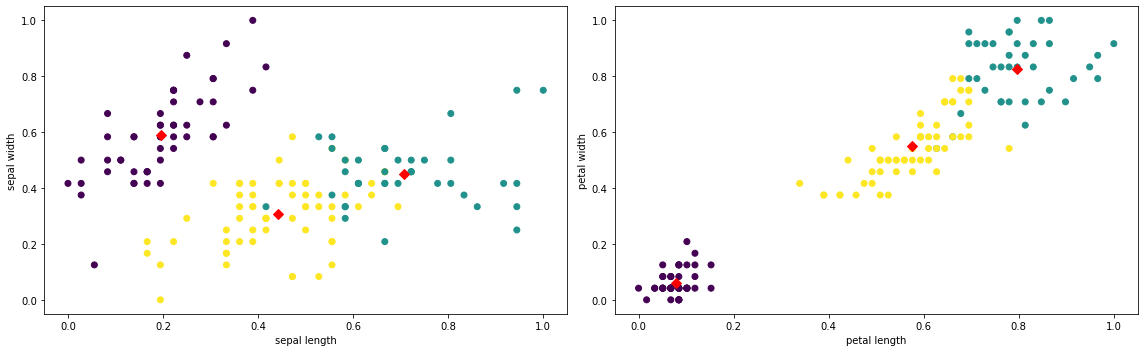

In [10]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
cluster_plot(features, 0, 1)

plt.subplot(1,2,2)
cluster_plot(features, 2, 3)

plt.tight_layout()
plt.show()

In [11]:
# Create a DataFrame with labels and varieties as columns: df
df_ = pd.DataFrame({'labels': labels, 'class': df['class'].values.tolist()})

# Create crosstab: ct
ct = pd.crosstab(df_['labels'], df_['class'])

# Display ct
print(ct)

class   Iris-setosa  Iris-versicolor  Iris-virginica
labels                                              
0                50                0               0
1                 0                3              36
2                 0               47              14


#### Elbow_method

In [12]:
def elbow(scaled_data, num_of_clusters):
    
    # A loop will be used to plot the explanatory power for up to 10 KMeans clusters
    inertias = []

    for k in num_of_clusters:
        # Initialize the KMeans object using the current number of clusters (k)
        km = KMeans(n_clusters=k, random_state=42)

        # Fit the scaled features to the KMeans object
        km.fit(scaled_data)

        # Append the inertia for 'km' to the list of inertias
        inertias.append(km.inertia_)

    # Plot the results in a line plot
    plt.plot(num_of_clusters, inertias, marker='o')
    plt.xlabel("number of clusters")
    plt.ylabel("inertia")
    plt.title("screeplot to find the 'elbow'")
    plt.show()

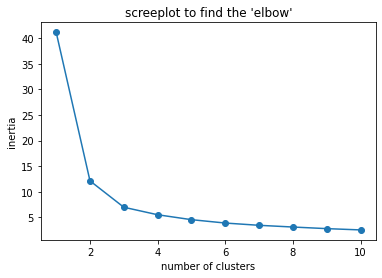

In [13]:
elbow(features, range(1,11))

k = 3 is the best choice for this dataset